In [3]:
BEIJING, CHANGCHUN, MULUMUQI, WUHAN, GUANGZHOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK ,CHENGDU, CHONGQING= """
BEIJING CHANGCHUN MULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANHAI NEWYORK CHENGDU CHONGQING
""".split()

In [4]:
dictionary = {}

In [5]:
dictionary[BEIJING] = 0     #防止出错

In [6]:
connection = {
            CHANGCHUN : [CHENGDU,SHANGHAI,CHONGQING,BEIJING,GUANGZHOU],
            MULUMUQI : [CHONGQING, BEIJING,SHANGHAI], 
            BEIJING: [ CHANGCHUN, WUHAN, SHENZHEN, NEWYORK,MULUMUQI],
            NEWYORK: [ SHANGHAI,BEIJING],
            SHANGHAI: [NEWYORK, WUHAN],
            WUHAN:[SHANGHAI, BEIJING, GUANGZHOU],
            GUANGZHOU:[WUHAN, BANGKOK],
            SHENZHEN: [WUHAN, BANGKOK],
            BANGKOK: [SHENZHEN,GUANGZHOU],
            CHENGDU:[GUANGZHOU,MULUMUQI,CHANGCHUN],
            CHONGQING:[WUHAN, GUANGZHOU,BEIJING,]
            
}

In [7]:
import networkx as nx #NetworkX是一款Python的软件包，用于创造、操作复杂网络，以及学习复杂网络的结构、动力学及其功能

In [8]:
%matplotlib inline

内嵌绘图

In [9]:
graph = connection

In [10]:
g = nx.Graph(graph)

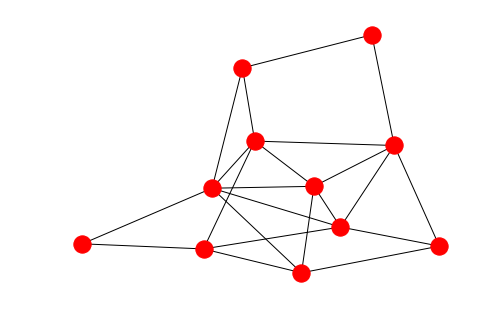

In [11]:
nx.draw(g)

In [12]:
def nagivator(start, destination, connection_graph):
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1] #why
         
        if  froniter in seen: continue
            
        successors = connection_graph[froniter]
    
        for s in successors:
            if s == destination:
                path.append(s)
                return path
            else:
                pathes.append(path+[s]) #只加最短的
        
        pathes = sorted(pathes, key=len)
    
        seen.add(froniter)

In [13]:
def draw_route(routes):
    print('🛫->'.join(routes))

In [14]:
draw_route(nagivator(NEWYORK, GUANGZHOU, connection))

NEWYORK🛫->SHANHAI🛫->WUHAN🛫->GUANGZHOU


In [15]:
draw_route(nagivator(CHANGCHUN, SHENZHEN, connection))

CHANGCHUN🛫->BEIJING🛫->SHENZHEN


In [46]:
def nagivator_bfs(start, destination, connection_2):
    pathes = [start ]
    seen = set()
    
    while pathes:

        froniter =pathes.pop(0) #why
         
        if  froniter in seen: continue
            
        successors = connection_2[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = pathes + successors
    
        seen.add(froniter)

In [47]:
connection_2={
        0:[1, 5],
        1:[0, 2],
        2:[1, 3],
        3:[2, 4],
        4:[3],
        5:[0, 6],
        6:[5, 7],
        7:[6]
    
}

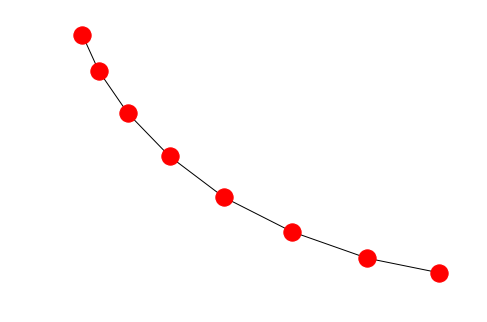

In [48]:
nx.draw(nx.Graph(connection_2))

In [49]:
nagivator_bfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 5 Looking forward [0, 6]
standing on 2 Looking forward [1, 3]
standing on 6 Looking forward [5, 7]
standing on 3 Looking forward [2, 4]
standing on 7 Looking forward [6]
standing on 4 Looking forward [3]


In [42]:
nagivator_bfs(BEIJING, SHENZHEN, connection)

Looking forward ['CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK', 'MULUMUQI']
Looking forward ['CHENGDU', 'SHANHAI', 'CHONGQING', 'BEIJING', 'GUANGZHOU']
Looking forward ['SHANHAI', 'BEIJING', 'GUANGZHOU']
Looking forward ['WUHAN', 'BANGKOK']
Looking forward ['SHANHAI', 'BEIJING']
Looking forward ['CHONGQING', 'BEIJING', 'SHANHAI']
Looking forward ['GUANGZHOU', 'MULUMUQI', 'CHANGCHUN']
Looking forward ['NEWYORK', 'WUHAN']
Looking forward ['WUHAN', 'GUANGZHOU', 'BEIJING']
Looking forward ['WUHAN', 'BANGKOK']
Looking forward ['SHENZHEN', 'GUANGZHOU']


In [56]:
def nagivator_dfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    
    while pathes:

        froniter =pathes.pop(0) #why
         
        if  froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = successors + pathes
    
        seen.add(froniter)

In [57]:
nagivator_dfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 2 Looking forward [1, 3]
standing on 3 Looking forward [2, 4]
standing on 4 Looking forward [3]
standing on 5 Looking forward [0, 6]
standing on 6 Looking forward [5, 7]
standing on 7 Looking forward [6]


# Sentence Generation

In [75]:
decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [76]:
grammar = """
stmt = if block else block
block = cmp; assigment
assgiment = XXX
XXX
"""

In [77]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [78]:
import random

In [79]:
#def adj(): return random.choice(["蓝色的", "好看的", "小小的"])

In [80]:
# def noun(): return random.choice("女人 |  篮球 | 桌子 | 小猫".split("|"))
# def artice(): return random.choice("一个 | 这个".split("|"))
# def verb(): return random.choice("看着   |  坐在 |  听着 | 看见".split("|"))

In [87]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'):
        line = line.strip() #Python strip() 方法用于移除字符串头尾指定的字符（默认为空格或换行符）或字符序列。
        if not line:continue
            
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    return grammar

In [88]:
g = parse_grammar(grammar)

In [102]:
def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed: return target
    
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [103]:
random.choice((g['noun']))

['小猫']

In [104]:
random.choice(g['Adj*'])

['Adj', 'Adj*']

In [106]:
gene(g)

'一个篮球听着一个女人'

In [107]:
for i in range(20):
    print(gene(parse_grammar(decimal_grammar, sep='='), target='expression'))

7-9+7-4
6*5-75-8
9/61/2/4
9*8*1/3
0-9/5-8
2-1/4+3
6/02*3-6
6/4/4-9
4+1+0+0
2-33*0+9
1*12-5+7
0*11*8/3
8/7*7*2
5+1/3-098
7-6+3+7
0-7-8+3
8/5*9/5
3-8+0/9
1*0+2*1
8/1+1*7
